In [1]:
# importing necessary libraries and setting certain global params
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import (metrics ,linear_model , preprocessing)
from sklearn.metrics import classification_report , accuracy_score 
from sklearn.model_selection import train_test_split , cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoLarsIC
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
# pd.set_option("display.max_columns", 50)
import warnings
warnings.filterwarnings("ignore")
from functions import *
import functions as feat

In [2]:
print ('default',os.getcwd())

default /Users/flatironschool/Desktop/london-ds-111819/MY_Class_Edits/projects/Predicting_Life_Expectancy


In [3]:
# pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None

In [6]:
path = 'dataset/Cleaned_health_data.csv'
df=pd.read_csv(path)
df

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death_raw_value,adult_smoking_raw_value,adult_obesity_raw_value,...,income_inequality_raw_value,children_in_single_parent_households_raw_value,social_associations_raw_value,violent_crime_raw_value,injury_deaths_raw_value,air_pollution_particulate_matter_raw_value,drinking_water_violations_raw_value,severe_housing_problems_raw_value,driving_alone_to_work_raw_value,long_commute_driving_alone_raw_value
0,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,0.191247,0.375,...,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.859651,0.383
1,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,0.167955,0.310,...,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.847194,0.405
2,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,0.215409,0.443,...,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.834044,0.338
3,1,7,1007,AL,Bibb County,2019,1.0,11783.543675,0.199164,0.378,...,4.254594,0.295654,10.157665,89.349126,100.077937,11.2,0.0,0.109609,0.863659,0.486
4,1,9,1009,AL,Blount County,2019,1.0,10908.101822,0.196522,0.344,...,4.126883,0.295697,9.011507,482.690611,105.197227,11.7,0.0,0.104012,0.867923,0.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,56,35,56035,WY,Sublette County,2019,1.0,5657.772195,0.144150,0.258,...,3.094555,0.255266,8.189170,66.030069,80.702108,5.1,1.0,0.060690,0.765296,0.300
2469,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,0.175669,0.302,...,4.393951,0.234619,9.962640,300.494146,85.365634,5.1,1.0,0.095923,0.774592,0.186
2470,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,0.181806,0.318,...,4.635869,0.216457,5.295335,71.006517,98.020373,5.9,1.0,0.111333,0.774118,0.178
2471,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,0.156076,0.297,...,3.611459,0.266296,19.429265,78.266105,70.028011,4.8,0.0,0.105413,0.771630,0.106


In [7]:
print('Life Expectancy Data - rows:' , df.shape[0],'columns:', df.shape[1])

Life Expectancy Data - rows: 2473 columns: 38


In [8]:
df1 = df.copy()

In [ ]:
# df = df1.copy() # in case we mess something up along the line

# <a id='7'>Getting Numberical And Categorical Columns<a/>

In [11]:
def get_cat(df):
    """get list of cat features from df"""
    cat = []
    for x in df.columns:
        if df[x].dtypes == 'object':
            cat.append(x)
    return cat

cat1 = get_cat(df)


In [12]:
cat1

['state', 'county']

In [13]:
def get_nom(df):
    """get nom features"""
    nom = []
    for x in df.columns:
        if df[x].dtypes != 'object':
            nom.append(x)
    return nom[2:] # no need for feature id and age but customise according to df

nom1 = get_nom(df)


In [14]:
nom1

['fipscode',
 'year',
 'county_ranked',
 'premature_death_raw_value',
 'adult_smoking_raw_value',
 'adult_obesity_raw_value',
 'food_environment_index_raw_value',
 'physical_inactivity_raw_value',
 'access_to_exercise_opportunities_raw_value',
 'excessive_drinking_raw_value',
 'alcohol_impaired_driving_deaths_raw_value',
 'sexually_transmitted_infections_raw_value',
 'teen_births_raw_value',
 'uninsured_raw_value',
 'primary_care_physicians_raw_value',
 'dentists_raw_value',
 'mental_health_providers_raw_value',
 'preventable_hospital_stays_raw_value',
 'mammography_screening_raw_value',
 'flu_vaccinations_raw_value',
 'high_school_graduation_raw_value',
 'some_college_raw_value',
 'unemployment_raw_value',
 'children_in_poverty_raw_value',
 'income_inequality_raw_value',
 'children_in_single_parent_households_raw_value',
 'social_associations_raw_value',
 'violent_crime_raw_value',
 'injury_deaths_raw_value',
 'air_pollution_particulate_matter_raw_value',
 'drinking_water_violations_r

# <a id='7'>Heatmap To Show Distribution of data<a/>

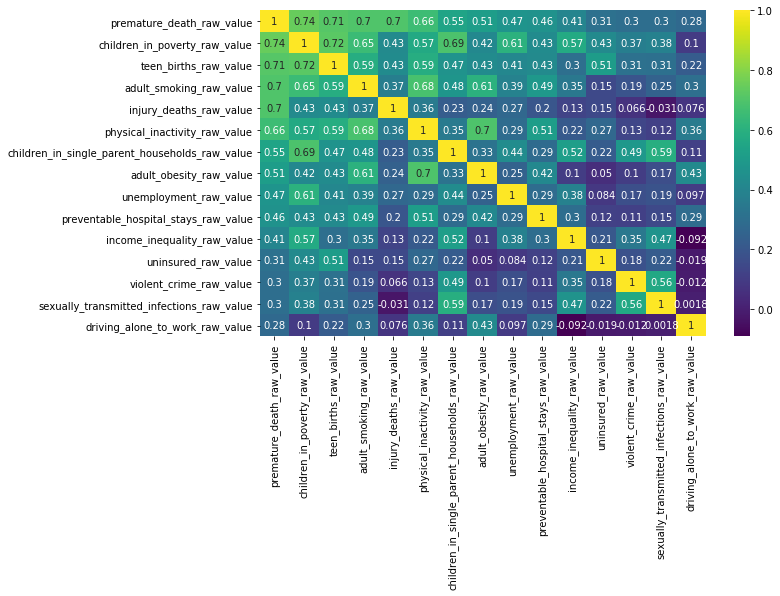

In [17]:
target = 'premature_death_raw_value'
k = 15
cols = df[nom1].corr().nlargest(k , target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm , annot = True , cmap = 'viridis')

# Observation

Now on looking at the above heatmap we can see some features have very high values . Hence the rule of Multicollinearity
may apply . Once there are highly correlated features usually above the threshold of 0.64 we need to drop those features


# Checking for highly correlated variables

In [19]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.6) &
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k],
                         np.round(df.corr().iloc[k, i], 2)))
        
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                       [i[1] for i in corrs],
                       [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column', 1:'row', 2:'corr'})
corrsdf[:15]

,column,row,corr
0,statecode,fipscode,1
1,fipscode,statecode,1
2,premature_death_raw_value,adult_smoking_raw_value,0.7
3,adult_smoking_raw_value,premature_death_raw_value,0.7
4,adult_obesity_raw_value,adult_smoking_raw_value,0.61
5,physical_inactivity_raw_value,premature_death_raw_value,0.66
6,teen_births_raw_value,premature_death_raw_value,0.71
7,primary_care_physicians_raw_value,dentists_raw_value,0.62
8,dentists_raw_value,primary_care_physicians_raw_value,0.62
9,unemployment_raw_value,children_in_poverty_raw_value,0.61


# <a id='7'>Modelling<a/>

In [38]:
target_vars = ['premature_death_raw_value']
cat_vars = ['statecode','countycode','fipscode','year','county_ranked']

feature_vars = list(df.columns)[8:]

In [37]:
feature_vars

['adult_smoking_raw_value',
 'adult_obesity_raw_value',
 'food_environment_index_raw_value',
 'physical_inactivity_raw_value',
 'access_to_exercise_opportunities_raw_value',
 'excessive_drinking_raw_value',
 'alcohol_impaired_driving_deaths_raw_value',
 'sexually_transmitted_infections_raw_value',
 'teen_births_raw_value',
 'uninsured_raw_value',
 'primary_care_physicians_raw_value',
 'dentists_raw_value',
 'mental_health_providers_raw_value',
 'preventable_hospital_stays_raw_value',
 'mammography_screening_raw_value',
 'flu_vaccinations_raw_value',
 'high_school_graduation_raw_value',
 'some_college_raw_value',
 'unemployment_raw_value',
 'children_in_poverty_raw_value',
 'income_inequality_raw_value',
 'children_in_single_parent_households_raw_value',
 'social_associations_raw_value',
 'violent_crime_raw_value',
 'injury_deaths_raw_value',
 'air_pollution_particulate_matter_raw_value',
 'drinking_water_violations_raw_value',
 'severe_housing_problems_raw_value',
 'driving_alone_to_wo

# <a id='7'>Creating training and testing data<a/>

In [60]:

features2 = [f for f in df.columns if f not in df[cat_vars] & df[target_vars]]
target2 = 'premature_death_raw_value'


TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [51]:
target2

'premature_death_raw_value'

In [55]:
features2

['statecode',
 'countycode',
 'fipscode',
 'state',
 'county',
 'year',
 'county_ranked',
 'premature_death_raw_value',
 'adult_smoking_raw_value',
 'adult_obesity_raw_value',
 'food_environment_index_raw_value',
 'physical_inactivity_raw_value',
 'access_to_exercise_opportunities_raw_value',
 'excessive_drinking_raw_value',
 'alcohol_impaired_driving_deaths_raw_value',
 'sexually_transmitted_infections_raw_value',
 'teen_births_raw_value',
 'uninsured_raw_value',
 'primary_care_physicians_raw_value',
 'dentists_raw_value',
 'mental_health_providers_raw_value',
 'preventable_hospital_stays_raw_value',
 'mammography_screening_raw_value',
 'flu_vaccinations_raw_value',
 'high_school_graduation_raw_value',
 'some_college_raw_value',
 'unemployment_raw_value',
 'children_in_poverty_raw_value',
 'income_inequality_raw_value',
 'children_in_single_parent_households_raw_value',
 'social_associations_raw_value',
 'violent_crime_raw_value',
 'injury_deaths_raw_value',
 'air_pollution_particulat

In [39]:
target = df[target_vars]
features = df.drop(columns=cat_vars + target_vars)


In [40]:
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size = 0.20 , random_state = 12)

In [47]:
# creating a dataframe for train
Train = pd.merge(y_train, X_train, left_index=True, right_index=True)

# <a id='7'>Building a Baseline Model<a/>
The Baseline model is an ordinary least squares (OLS) regression fit to all 30 non-standardized Health Factors provided by the Robert Wood Johnson Foundation with a target of Premature Death.

In [ ]:
# generating the base model with all potential features
formula_base = target_var[0] + '~' + '+'.join(feature_vars)
model_base = ols(formula=formula_base,
                 data=train_raw)
results_base = model_base.fit()
results_base.summary()

In [48]:
formula_baseline = target_vars[0] + '~' + '+'.join(feature_vars)
model_baseline = ols(formula = formula_baseline , data = Train)
results_baseline = model_baseline.fit()
results_baseline.summary()

NameError: name 'target_var' is not defined

In [41]:
def variance_inflation_factor(feature_list, DataFrame):
    """
    Passes the inputs into statsmodel's variance_inflation_factor function.
    Returns a DataFrame with each feature and its variance inflation factor.
    """
    feature_df = DataFrame[feature_list]
    vif = [variance_inflation_factor(feature_df.values, i)
           for i in range(feature_df.shape[1])]
    data = list(zip(feature_list, vif))
    data_df = pd.DataFrame(data, columns=['Feature','VIF'])
    return data_df

In [44]:
variance_inflation_factor(feature_vars , df)

TypeError: 'int' object is not subscriptable